<a href="https://colab.research.google.com/github/Saadahm/Saadahm1/blob/main/Elastic_Net_Regression_Samsung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('005930.KS.csv')

In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,523.000000,523.000000,523.000000,523.000000,523.000000,5.230000e+02
mean,37824.015296,38890.114723,36915.908222,37928.661568,34140.940932,6.744126e+07
std,15916.738290,16371.771449,15559.271241,15935.509185,16596.217493,2.931286e+07
min,13680.000000,14760.000000,13440.000000,13600.000000,11175.750000,0.000000e+00
25%,25810.000000,26520.000000,25240.000000,25770.000000,21741.436524,4.856692e+07
50%,30360.000000,31160.000000,29780.000000,30540.000000,25453.410156,6.066430e+07
75%,47500.000000,49250.000000,46490.000000,47730.000000,43727.035157,7.755890e+07
max,90000.000000,96800.000000,87800.000000,88800.000000,88407.148438,2.348832e+08


In [4]:
df['Date']=pd.to_datetime(df.Date)

In [5]:
df.shape

(523, 7)

In [6]:
df.drop('Adj Close',axis=1,inplace = True)

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2011-06-13,16880.0,17460.0,16060.0,16380.0,86986900
1,2011-06-20,16260.0,17080.0,15900.0,17040.0,96266850
2,2011-06-27,16940.0,17200.0,16420.0,17100.0,76047550
3,2011-07-04,17400.0,17980.0,17380.0,17700.0,83693400
4,2011-07-11,17600.0,17600.0,16420.0,16640.0,78787450


In [8]:
x=df[['Open','High','Low','Volume']]
y=df['Close']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [10]:
x_train.shape

(392, 4)

In [11]:
x_test.shape

(131, 4)

In [12]:
from sklearn.linear_model import ElasticNet

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
regressor=ElasticNet(alpha=1.0, l1_ratio=0.5)


In [14]:
regressor.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77389882.35682392, tolerance: 9687678.312653061
  positive)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [15]:
print(regressor.coef_)

[-5.87624172e-01  1.00861028e+00  5.67125587e-01 -6.65251064e-06]


In [16]:
print(regressor.intercept_)

438.46795561558247


In [17]:
predicted=regressor.predict(x_test)

In [18]:
print(x_test)

        Open     High      Low     Volume
15   15200.0  16960.0  15180.0  118318100
78   30120.0  30720.0  29380.0   85543650
137  25860.0  26080.0  25460.0   44229500
264  29280.0  29500.0  28240.0   57607850
113  24600.0  26020.0  24500.0   55491750
..       ...      ...      ...        ...
71   25540.0  26440.0  25520.0   60124150
473  54000.0  55900.0  52300.0  101050903
6    17000.0  17040.0  16520.0   59548450
8    15400.0  15780.0  13760.0  202264800
319  50700.0  51000.0  47380.0   66752950

[131 rows x 4 columns]


In [19]:
predicted.shape

(131,)

In [20]:
dframe=pd.DataFrame(y_test,predicted)


In [21]:
dfr=pd.DataFrame({'Actual Price':y_test, 'Predicted Price':predicted})

In [22]:
print(dfr)

     Actual Price  Predicted Price
15        16800.0     16434.464928
78        30300.0     29816.805486
137       25600.0     25691.843268
264       29200.0     28619.225283
113       25900.0     25752.370306
..            ...              ...
71        25740.0     26171.270912
473       52700.0     54076.503467
6         16880.0     16608.344250
8         14140.0     13763.005311
319       47760.0     48511.382459

[131 rows x 2 columns]


In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [24]:
regressor.score(x_test,y_test)

0.9983184654651536

In [25]:
import math

In [26]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 458.36284258822457


In [27]:
print('Mean Square Error:',metrics.mean_squared_error(y_test,predicted))

Mean Square Error: 457516.3411431544


In [28]:
print('Root Mean Absolute Error:',math.sqrt(metrics.mean_absolute_error(y_test,predicted)))

Root Mean Absolute Error: 21.409410141062377


In [29]:
graph=dfr.head(30)

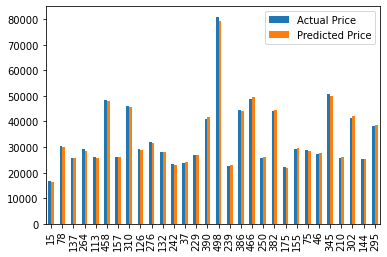

In [30]:
graph.plot(kind='bar')